## Summer 2022 Data Science Intern Challenge 

Q1)
On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. 

We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

b) What metric would you report for this dataset?

c) What is its value?


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
#convert csv to pd dataframe
df = pd.read_csv('/content/drive/MyDrive/shopify/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


## Part 1 - Exploratory Data Analysis (EDA)

In [ ]:
#no NULL values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [ ]:
print(df.nunique())

order_id          5000
shop_id            100
user_id            301
order_amount       258
total_items          8
payment_method       3
created_at        4991
dtype: int64


In [ ]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


1) The extreme standard deviation of order_amount suggests existence of outliers 

2) Even the minimum value - 90 and maximum value - 704000 suggests existence of outliers, the mean - 3145.128 is way above the minimum value  and maximum value! 

3) Another evident value is 75% of order amount is 390, again, much lesser than the mean and far off from minimum and maximum value

In [ ]:
df.shape

(5000, 7)

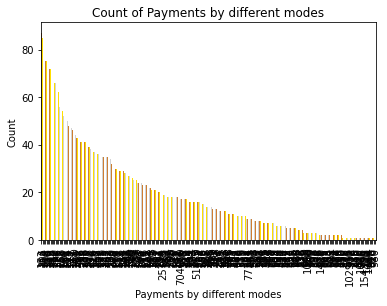

In [ ]:
plt.title('Count of Payments by different modes')
df['order_amount'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'])
plt.xlabel('Payments by different modes')
plt.ylabel('Count')
plt.show()

In [ ]:
print("The median order value is: $" + str(df.order_amount.median()))

The median order value is: $284.0


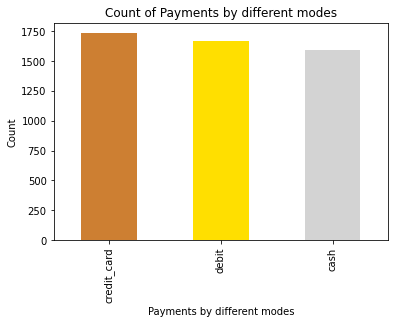

In [ ]:
plt.title('Count of Payments by different modes')
df['payment_method'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'])
plt.xlabel('Payments by different modes')
plt.ylabel('Count')
plt.show()

Data Distribution

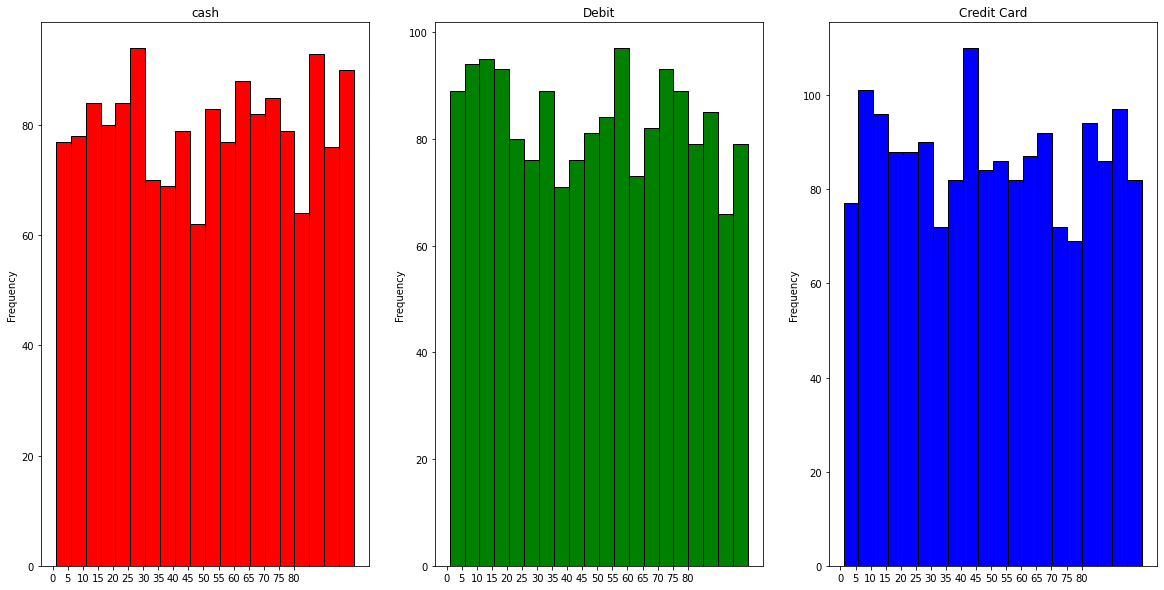

In [ ]:
f,ax=plt.subplots(1,3,figsize=(20,10))
df[df['payment_method']=='cash'].shop_id.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('cash')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
df[df['payment_method']=='debit'].shop_id.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Debit')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
df[df['payment_method']=='credit_card'].shop_id.plot.hist(ax=ax[2],color='blue',bins=20,edgecolor='black')
ax[2].set_title('Credit Card')
x3=list(range(0,85,5))
ax[2].set_xticks(x3)
plt.show()

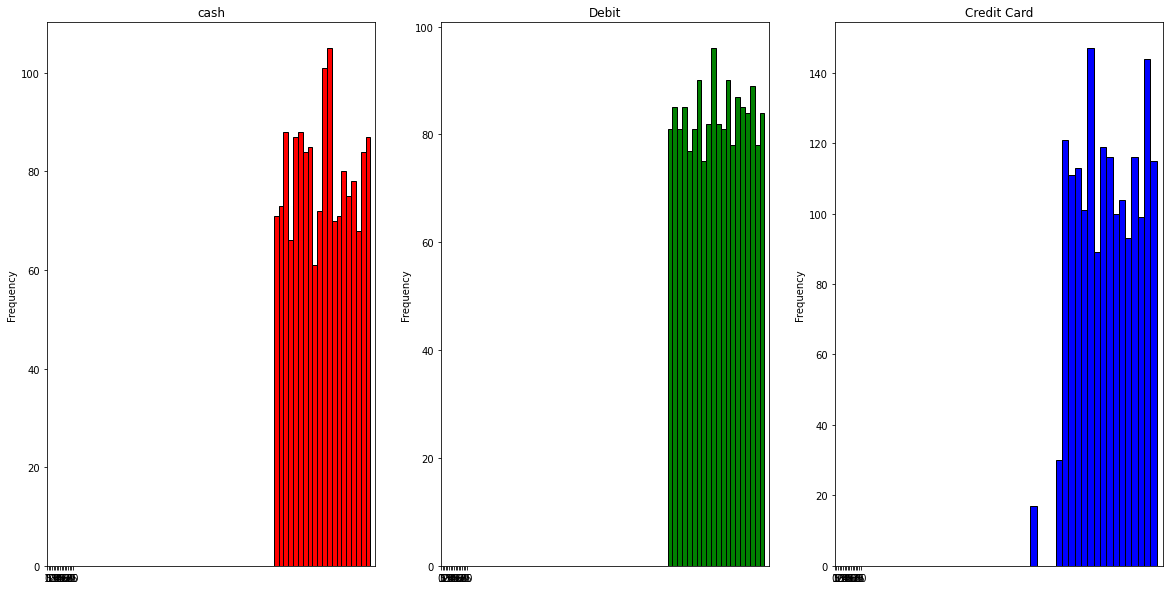

In [ ]:
f,ax=plt.subplots(1,3,figsize=(20,10))
df[df['payment_method']=='cash'].user_id.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('cash')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
df[df['payment_method']=='debit'].user_id.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Debit')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
df[df['payment_method']=='credit_card'].user_id.plot.hist(ax=ax[2],color='blue',bins=20,edgecolor='black')
ax[2].set_title('Credit Card')
x3=list(range(0,85,5))
ax[2].set_xticks(x3)
plt.show()

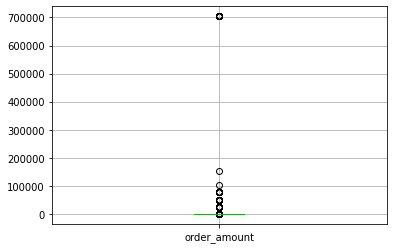

In [ ]:
df.boxplot(column='order_amount')

lot of outliers, let's remove the outliers and see how they are distributed

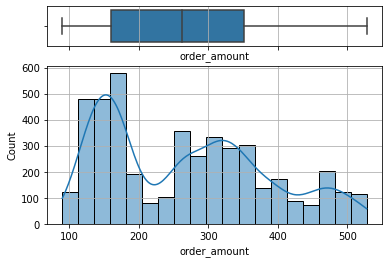

In [ ]:
updated_df = df[df.order_amount < np.percentile(df.order_amount,90)]
_, (axis_boxplot, axis_dist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 0.8)})

axis_boxplot.grid(True)
axis_dist.grid(True)
sns.boxplot(x=updated_df.order_amount, ax=axis_boxplot)
sns.histplot(x=updated_df.order_amount, ax=axis_dist, kde=True)
plt.show()

## Part 2

In [ ]:
#calculating AOV(average order value)
'''Average order value (AOV) is the average amount of money each customer spends per transaction with your store. 
You can calculate your average order value using this simple formula: Total revenue / number of orders = average order value.'''
order_sum = df['order_amount'].sum()
total_sum = df['total_items'].sum()
aov = order_sum/total_sum
print(aov)

357.92152221412965


Found out the mistake by committing a mistake myself :) (took number of orders as df['total_items'].count()

In [ ]:
#figuring out the mistake in the AOV given in the question
# order_sum = df['order_amount'].sum()
# total_sum = df[df.total_items>df.total_items.median()].sum()
# aov = order_sum/total_sum
# print(aov)
order_sum = df['order_amount'].sum()
total_sum = df['total_items'].count()
aov = order_sum/total_sum
print(aov)

In [ ]:
print(total_sum/order_sum)

0.0027939085468063622


a) The reason for the wrong calculation is that the author might have calculated AOV by counting the number of instance of the 'total_items' instead of summing them up together. The boxplot clearly shows the skewness. So AOV is not the best metric to use here 

b) Due to skewed dataset, I would suggest median as the appropriate metric as it minimizes the sum of absolute deviations

c) The value of the median is $284.0